In [2]:
import numpy as np
import pandas as pd

In [3]:
import requests
from bs4 import BeautifulSoup

# 데이터 수집

## 유엔 회원국
193개국

In [3]:
url = 'https://ko.wikipedia.org/wiki/유엔_회원국'

In [4]:
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [5]:
document1 = soup.find_all('td')
len(document1)

723

In [6]:
document1[0].text

' 가나'

In [7]:
document1[1].text

'1957년 3월 8일\n'

In [8]:
document1[2].text

' 가봉'

In [9]:
document1[3].text

'1960년 9월 20일\n'

In [10]:
document1[4].text.strip()

'가이아나'

In [11]:
document1[6].text.strip()

'감비아[1]'

In [12]:
document1[48].text.strip()

'독일동독과 서독 참조'

In [13]:
document1[384].text

' 헝가리'

In [14]:
print(document1[387].text)
print(document1[501].text)

10월 24일
3월 8일


document1 리스트의 384번째 원소까지에 회원국이 담겨있고 짝수번째 원소가 국가명에 관한 것임. 그 이후는 신경쓰지 않아도 됨<br>
감비아[1] 과 같은 표기가 있으니 [1]등을 제거해야한다.<br>

독일동독과 서독 참조와 같은 표기는 차후 수정

In [15]:
un_list = []
for i in range(193):
    # 중간 띄어쓰기 생략
    nation =  document1[2*i].text.replace(' ','')
    if nation[-1] == ']':
        temp_list = nation.split('[')
        nation = temp_list[0]
    un_list.append(nation)

print(len(un_list))    
print(un_list[:8])


193
['가나', '가봉', '가이아나', '감비아', '과테말라', '그레나다', '그리스', '기니']


In [16]:
un_series = pd.Series(un_list)
un_series

0        가나
1        가봉
2      가이아나
3       감비아
4      과테말라
       ... 
188     프랑스
189      피지
190     핀란드
191     필리핀
192     헝가리
Length: 193, dtype: object

## 1인당 GDP
2019년 국제통화기금

In [17]:
url = 'https://ko.wikipedia.org/wiki/일인당_명목_국내_총생산순_나라_목록'

In [18]:
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [19]:
# 원래 soup.prettify()를 조회해 확인하였으나 파일의 용량을 너무 크게 차지하는 관계로 주석처리하였습니다.
# 아래 주석 처리된 셀들도 모두 마찬가지입니다.

In [20]:
gdp = list(soup.children)[3]

In [21]:
# gdp.find_all('tbody')[1].find_all('tr')

In [22]:
gdp_doc = gdp.find_all('tbody')[1].find_all('tr')[1]

In [23]:
# gdp_doc

In [24]:
gdp_doc.find_all('td')[1].text

'1'

In [25]:
gdp_doc.find_all('td')[2].text

' 룩셈부르크'

In [26]:
gdp_doc.find_all('td')[3].text

'113,196\n'

In [27]:
gdp_doc.find_all('td')[4]

<td>2</td>

국가별로 리스트의 3개씩 원소 차지<br>
위키항목을 확인하면 남수단이 제일 마지막이므로 while문을 이용해 정보를 가져올 수 있다. 

In [28]:
nation = []
gdp = []
info = gdp_doc.find_all('td')

i = 1
name = 'aa'
while name != '남수단':
    # 중간 띄어쓰기 생략
    name = info[(3*i)-1].text.replace(' ','')
    money = info[3*i].text[:-1].replace(',','')
    nation.append(name)
    gdp.append(int(money))
    i+=1

print(len(nation),len(gdp))    

191 191


In [29]:
print(nation[:5])
print(gdp[:5])

['룩셈부르크', '스위스', '마카오', '노르웨이', '아일랜드']
[113196, 83717, 81151, 77975, 77771]


In [30]:
gdp_df = pd.DataFrame(np.array([nation,gdp]).T,columns=['국가','gdp'])

In [31]:
gdp_df

,국가,gdp
0,룩셈부르크,113196
1,스위스,83717
2,마카오,81151
3,노르웨이,77975
4,아일랜드,77771
...,...,...
186,니제르,405
187,말라위,371
188,에리트레아,343
189,부룬디,310


## 평균수명
유엔이 발표한 2015~2020년 각국의 기대수명 순위이다. 성별로 따로 집계돼 있기도 하지만 따로 고려하지 않도록 한다.

In [32]:
url = 'https://ko.wikipedia.org/wiki/평균_수명순_나라_목록'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [33]:
exp_life_list = list(soup.children)[3].find_all('tr')

In [34]:
exp_life_list[0]

<tr>
<th>순위</th>
<th>국가/영토</th>
<th>전체</th>
<th>남성</th>
<th>여성
</th></tr>

In [35]:
exp_life_list[1]

<tr>
<td>1</td>
<td><span class="flagicon"><a class="image" href="/wiki/%ED%8C%8C%EC%9D%BC:Flag_of_Japan.svg" title="일본"><img alt="일본" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Flag_of_Japan.svg/22px-Flag_of_Japan.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Flag_of_Japan.svg/33px-Flag_of_Japan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Flag_of_Japan.svg/44px-Flag_of_Japan.svg.png 2x" width="22"/></a></span> <a href="/wiki/%EC%9D%BC%EB%B3%B8" title="일본">일본</a></td>
<td>84.74</td>
<td>81.91</td>
<td>87.58
</td></tr>

In [36]:
exp_life_list[2].find_all('td')

[<td>2</td>,
 <td><span class="flagicon"><a class="image" href="/wiki/%ED%8C%8C%EC%9D%BC:Flag_of_South_Korea.svg" title="대한민국"><img alt="대한민국" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/22px-Flag_of_South_Korea.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/33px-Flag_of_South_Korea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/44px-Flag_of_South_Korea.svg.png 2x" width="22"/></a></span> <a href="/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD" title="대한민국">대한민국</a></td>,
 <td>83.31</td>,
 <td>80.00</td>,
 <td>86.49
 </td>]

In [37]:
exp_life_list[2].find_all('td')[1].text

' 대한민국'

In [38]:
exp_life_list[2].find_all('td')[2].text

'83.31'

In [39]:
len(exp_life_list)

407

문서내에는 407개 정도가 입력한 태그와 일치하는 것 같으나 201개만 조회하면 된다.

In [40]:
nation = []
life = []

for i in range(1,202):
    # 중간 띄어쓰기 생략
    name = exp_life_list[i].find_all('td')[1].text.replace(' ','')
    num = exp_life_list[i].find_all('td')[2].text
    nation.append(name)
    life.append(float(num))

In [41]:
print(len(nation))
print(len(life))

201
201


In [42]:
# 잘 스크래핑된 것 확인
nation[-1]

'스와질란드'

In [43]:
life_df = pd.DataFrame(np.array([nation,life]).T,columns=['국가','평균수명'])
life_df

,국가,평균수명
0,일본,84.74
1,대한민국,83.31
2,이탈리아,82.84
3,스위스,82.66
4,싱가포르,82.64
...,...,...
196,코트디부아르,50.97
197,시에라리온,50.19
198,중앙아프리카공화국,49.53
199,레소토,49.5


## 언론자유지수
국경 없는 기자회(RSF)에서 매년 언론자유지수를 발표한다.<br>
'https://rsf.org/en/ranking' 를 통해 자료를 얻을 수도 있지만 위키백과에 2019년 자료가 똑같이 업데이트되어있으니 그것을 이용하도록 한다.

In [44]:
url = 'https://ko.wikipedia.org/wiki/언론_자유_지수'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [45]:
html = list(soup.children)[3]

In [46]:
# html 변수의 4번째에서부터 순위 시작
html.find_all('tr')[3].find_all('td')[0].text

' 노르웨이\n'

In [47]:
html.find_all('tr')[3].find_all('td')[1].text

'(001)7,82\n'

In [48]:
# 마지막 순위는 투르크메니스탄

nation = []
press_ = []

i = 1
name = 'aa'
while name != '투르크메니스탄':
    info = html.find_all('tr')[i+2].find_all('td')
    # 중간 띄어쓰기 생략
    name = info[0].text[:-1].replace(' ','')
    number = info[1].text[:-1][5:].replace(',','.')
    nation.append(name)
    press_.append(float(number))
    i+=1

print(len(nation),len(press_))    

180 180


In [49]:
print(nation[:4],press_[:4])
print(nation[-4:],press_[-4:])

['노르웨이', '핀란드', '스웨덴', '네덜란드'] [7.82, 7.9, 8.31, 8.63]
['중국', '에리트레아', '조선민주주의인민공화국', '투르크메니스탄'] [78.92, 80.26, 83.4, 85.44]


In [50]:
press = pd.DataFrame(np.array([nation,press_]).T,columns=['국가','언론자유지수'])
press

,국가,언론자유지수
0,노르웨이,7.82
1,핀란드,7.9
2,스웨덴,8.31
3,네덜란드,8.63
4,덴마크,9.87
...,...,...
175,베트남,74.93
176,중국,78.92
177,에리트레아,80.26
178,조선민주주의인민공화국,83.4


## 민주주의지수
영국의 '이코노미스트'에서 발표된 2018년 자료를 기준으로 한다.

In [51]:
url = 'https://ko.wikipedia.org/wiki/민주주의_지수'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
html = list(soup.children)[3]

In [52]:
# 2에서부터 시작
html.find_all('tr')[2].find_all('td')[1].text

' 노르웨이'

In [53]:
html.find_all('tr')[2].find_all('td')[2].text

'9.87'

In [55]:
# 마지막 순위는 북한

nation = []
democ = []

i = 1
name = 'aa'
while name != '북한':
    info = html.find_all('tr')[i+1].find_all('td')
    # 중간 띄어쓰기 생략
    name = info[1].text.replace(" ",'')
    number = info[2].text
    nation.append(name)
    democ.append(float(number))
    i+=1

print(len(nation),len(democ))
print(nation[:4],democ[:4])
print(nation[-4:],democ[-4:])

167 167
['노르웨이', '아이슬란드', '스웨덴', '뉴질랜드'] [9.87, 9.58, 9.39, 9.26]
['시리아', '중앙아프리카공화국', '콩고민주공화국', '북한'] [1.43, 1.32, 1.13, 1.08]


In [56]:
demo = pd.DataFrame(np.array([nation,democ]).T,columns=['국가','민주주의지수'])
demo

,국가,민주주의지수
0,노르웨이,9.87
1,아이슬란드,9.58
2,스웨덴,9.39
3,뉴질랜드,9.26
4,핀란드,9.25
...,...,...
162,차드,1.61
163,시리아,1.43
164,중앙아프리카공화국,1.32
165,콩고민주공화국,1.13


## 부패인식지수
국제투명성기구(TI)에서 2018년 발표한 자료를 출처로 한다.<br>
높을수록 부정부패로부터 깨끗한 상태이다.

In [57]:
url = 'https://ko.wikipedia.org/wiki/부패_인식_지수'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
html = list(soup.children)[3]

In [58]:
# 4에서부터 시작
html.find_all('tr')[4].find_all('td')[1].text

' 덴마크'

In [59]:
html.find_all('tr')[4].find_all('td')[2].text

'88'

In [60]:
# 마지막 순위는 소말리아

nation = []
corrupt = []

i = 1
name = 'aa'
while name != '소말리아':
    info = html.find_all('tr')[3+i].find_all('td')
    # 중간 띄어쓰기 생략
    name = info[1].text.replace(' ','')
    number = info[2].text
    nation.append(name)
    corrupt.append(float(number))
    i+=1

print(len(nation),len(corrupt))
print(nation[:4],corrupt[:4])
print(nation[-4:],corrupt[-4:])

169 169
['덴마크', '뉴질랜드', '핀란드', '스웨덴'] [88.0, 87.0, 85.0, 85.0]
['예멘', '시리아', '남수단', '소말리아'] [14.0, 13.0, 13.0, 10.0]


In [61]:
corruption = pd.DataFrame(np.array([nation,corrupt]).T,columns=['국가','청렴도'])
corruption

,국가,청렴도
0,덴마크,88.0
1,뉴질랜드,87.0
2,핀란드,85.0
3,스웨덴,85.0
4,스위스,85.0
...,...,...
164,수단,16.0
165,예멘,14.0
166,시리아,13.0
167,남수단,13.0


## 문해율
2013년 CIA 월드 팩트북

In [63]:
url = 'https://ko.wikipedia.org/wiki/문해율에 따른 나라 목록'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
html = list(soup.children)[3]

In [64]:
len(html.find_all('table'))

4

In [65]:
table = html.find_all('table')[2]

In [66]:
table.find_all('td')[0]

<td>1</td>

In [67]:
table.find_all('td')[1].text

' 안도라'

In [68]:
table.find_all('td')[2].text

'100.00\n'

In [69]:
table.find_all('td')[3]

<td>2</td>

In [70]:
len(table.find_all('td'))

651

In [71]:
table.find_all('td')[216*3+2]

<td>27.00
</td>

In [72]:
nation = []
liter = []
info = table.find_all('td')

for i in range(217):
    # 중간 띄어쓰기 생략
    name = info[3*i+1].text.replace(' ','')
    number = info[3*i+2].text[:-1]
    nation.append(name)
    liter.append(float(number))
    
print(len(nation),len(liter))
print(nation[:4],liter[:4])
print(nation[-4:],liter[-4:])

217 217
['안도라', '핀란드', '그린란드', '바티칸시국'] [100.0, 100.0, 100.0, 100.0]
['부르키나파소', '니제르', '아프가니스탄', '남수단'] [28.7, 28.7, 28.1, 27.0]


In [73]:
literacy = pd.DataFrame(np.array([nation,liter]).T,columns=['국가','문해율'])
literacy

,국가,문해율
0,안도라,100.0
1,핀란드,100.0
2,그린란드,100.0
3,바티칸시국,100.0
4,리히텐슈타인,100.0
...,...,...
212,말리,33.4
213,부르키나파소,28.7
214,니제르,28.7
215,아프가니스탄,28.1


## 교육지수
“Human Development Data (1990-2015)”. United Nations Development Programme.<br>
인간개발보고서(2016)

In [77]:
url = 'https://ko.wikipedia.org/wiki/교육 지수'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
html = list(soup.children)[3]

In [82]:
html.find_all('tr')[2].text.split('\n')

['', '1', ' 오스트레일리아', '0.939', '20.4', '13.2', '2', '']

In [84]:
# 마지막은 니제르

nation = []
edu = []
info = html.find_all('tr')

i=2
name='aa'
while name != '니제르':
    info_list = info[i].text.split('\n')
    name = info_list[2].replace(' ','')
    number = info_list[3]
    nation.append(name)
    edu.append(float(number))
    i+=1

print(len(nation),len(edu))
print(nation[:4],edu[:4])
print(nation[-4:],edu[-4:])

188 188
['오스트레일리아', '덴마크', '뉴질랜드', '노르웨이'] [0.939, 0.923, 0.917, 0.916]
['차드', '에리트레아', '부르키나파소', '니제르'] [0.28, 0.267, 0.262, 0.206]


In [87]:
education = pd.DataFrame(np.array([nation,edu]).T,columns=['국가','교육지수'])
education

,국가,교육지수
0,오스트레일리아,0.939
1,덴마크,0.923
2,뉴질랜드,0.917
3,노르웨이,0.916
4,독일,0.914
...,...,...
183,남수단,0.297
184,차드,0.28
185,에리트레아,0.267
186,부르키나파소,0.262


# 중간저장

In [88]:
un_series.to_excel('un.xlsx',index=False)
gdp_df.to_excel('gdp.xlsx',index=False)
life_df.to_excel('life.xlsx',index=False)
corruption.to_excel('corruption.xlsx',index=False)
demo.to_excel('demo.xlsx',index=False)
press.to_excel('press.xlsx',index=False)
literacy.to_excel('literacy.xlsx',index=False)
education.to_excel('education.xlsx',index=False)

# 선진국 여부
국제통화기금(IMF)이 분류한 39개국(홍콩,마카오,대만 등이 포함되어있음)

In [89]:
url = 'https://ko.wikipedia.org/wiki/선진국'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')
html = list(soup.children)[3]

In [90]:
len(html.find_all('table'))

9

In [107]:
html.find_all('table')[2].text

'\n\n•  그리스\n•  독일\n•  스웨덴\n•  아일랜드\n•  대한민국\n\n\n\n•  프랑스\n•  네덜란드\n•  룩셈부르크\n•  스위스\n•  영국\n\n\n\n•  중화민국\n•  핀란드\n•  노르웨이\n•  몰타\n•  스페인\n\n\n\n•  오스트레일리아\n•  체코\n•  뉴질랜드\n•  미국\n•  슬로베니아\n\n\n\n•  슬로바키아\n•  오스트리아\n•  캐나다\n•  에스토니아\n•  일본\n\n\n\n•  벨기에\n•  싱가포르\n•  이스라엘\n•  키프로스\n•  덴마크\n\n\n\n•  라트비아\n•  리투아니아\n•  홍콩\n•  포르투갈\n•  이탈리아\n\n\n•  산마리노[4]\n•  아이슬란드\n•  푸에르토리코\n•  마카오\n\n'

In [109]:
html.find_all('table')[2].text.replace('\n','').replace(' ','')

'•그리스•독일•스웨덴•아일랜드•대한민국•프랑스•네덜란드•룩셈부르크•스위스•영국•중화민국•핀란드•노르웨이•몰타•스페인•오스트레일리아•체코•뉴질랜드•미국•슬로베니아•슬로바키아•오스트리아•캐나다•에스토니아•일본•벨기에•싱가포르•이스라엘•키프로스•덴마크•라트비아•리투아니아•홍콩•포르투갈•이탈리아•산마리노[4]•아이슬란드•푸에르토리코•마카오'

In [110]:
html.find_all('table')[2].text.replace('\n','').replace(' ','').replace('[4]','')

'•그리스•독일•스웨덴•아일랜드•대한민국•프랑스•네덜란드•룩셈부르크•스위스•영국•중화민국•핀란드•노르웨이•몰타•스페인•오스트레일리아•체코•뉴질랜드•미국•슬로베니아•슬로바키아•오스트리아•캐나다•에스토니아•일본•벨기에•싱가포르•이스라엘•키프로스•덴마크•라트비아•리투아니아•홍콩•포르투갈•이탈리아•산마리노•아이슬란드•푸에르토리코•마카오'

In [113]:
nations = html.find_all('table')[2].text.replace('\n','').replace(' ','').replace('[4]','').split('•')[1:]

In [115]:
print(nations)

['그리스', '독일', '스웨덴', '아일랜드', '대한민국', '프랑스', '네덜란드', '룩셈부르크', '스위스', '영국', '중화민국', '핀란드', '노르웨이', '몰타', '스페인', '오스트레일리아', '체코', '뉴질랜드', '미국', '슬로베니아', '슬로바키아', '오스트리아', '캐나다', '에스토니아', '일본', '벨기에', '싱가포르', '이스라엘', '키프로스', '덴마크', '라트비아', '리투아니아', '홍콩', '포르투갈', '이탈리아', '산마리노', '아이슬란드', '푸에르토리코', '마카오']


CIA는 해당 목록에 8개국을 추가했다. 비 UN국을 제거하면 국가들 개수가 너무 적으므로 CIA가 추가한 선진국들을 같이 고려하도록 한다.

In [117]:
nations_ = html.find_all('table')[3].text.replace('\n','').replace(' ','').replace('[4]','').split('•')[1:]
print(nations_)

['리히텐슈타인', '모나코', '바티칸시국', '버뮤다', '안도라', '페로제도', '저지섬', '건지섬']


In [118]:
nations.extend(nations_)
print(nations)

['그리스', '독일', '스웨덴', '아일랜드', '대한민국', '프랑스', '네덜란드', '룩셈부르크', '스위스', '영국', '중화민국', '핀란드', '노르웨이', '몰타', '스페인', '오스트레일리아', '체코', '뉴질랜드', '미국', '슬로베니아', '슬로바키아', '오스트리아', '캐나다', '에스토니아', '일본', '벨기에', '싱가포르', '이스라엘', '키프로스', '덴마크', '라트비아', '리투아니아', '홍콩', '포르투갈', '이탈리아', '산마리노', '아이슬란드', '푸에르토리코', '마카오', '리히텐슈타인', '모나코', '바티칸시국', '버뮤다', '안도라', '페로제도', '저지섬', '건지섬']


In [119]:
developed = pd.Series(nations)
developed.to_excel('developed.xlsx',index=False)

# 데이터간 표기 일치

In [68]:
un = pd.read_excel('un.xlsx')
developed = pd.read_excel('developed.xlsx')
corruption = pd.read_excel('corruption.xlsx')
demo = pd.read_excel('demo.xlsx')
education = pd.read_excel('education.xlsx')
gdp = pd.read_excel('gdp.xlsx')
life = pd.read_excel('life.xlsx')
literacy = pd.read_excel('literacy.xlsx')
press = pd.read_excel('press.xlsx')

### un 회원국의 표기에 에러가 많으니 수정을 거쳐야함

In [69]:
# DataFrame으로 불러왔으니 Series로 저장
un = un[0]

In [70]:
un[20:30]

20          대한민국
21           덴마크
22       도미니카공화국
23        도미니카연방
24     독일동독과서독참조
25          동티모르
26           라오스
27         라이베리아
28      라트비아소련참조
29    러시아[6]소련참조
Name: 0, dtype: object

In [71]:
def repair(x):
    x1 = x.replace('소련참조','')
    x2 = x1.replace('동독과서독참조','')
    x3 = x2.replace('유고슬라비아참조','')
    x4 = x3.replace('중화민국참조','')
    if x4[-1]== ']':
        x4 = x4[:-3]
    return x4

In [72]:
un = un.map(repair)

In [73]:
un[20:30]

20       대한민국
21        덴마크
22    도미니카공화국
23     도미니카연방
24         독일
25       동티모르
26        라오스
27      라이베리아
28       라트비아
29        러시아
Name: 0, dtype: object

In [74]:
for i in range(len(un)):
    country = un.iloc[i]
    if country[-1] =='조':
        print(country)

말레이시아말라야연방참조
슬로바키아체코슬로바키아참조
시리아[23]아랍연합공화국참조
싱가포르말라야연방참조
예멘북예멘과남예멘참조
이집트아랍연합공화국참조
체코체코슬로바키아참조
탄자니아[39]탕가니카와잔지바르참조


In [75]:
repair_dict = {'말레이시아말라야연방참조':'말레이시아','슬로바키아체코슬로바키아참조':'슬로바키아',
               '시리아[23]아랍연합공화국참조':'시리아','싱가포르말라야연방참조':'싱가포르','예멘북예멘과남예멘참조':'예멘',
              '이집트아랍연합공화국참조':'이집트','체코체코슬로바키아참조':'체코','탄자니아[39]탕가니카와잔지바르참조':'탄자니아'}
def repair2(x):
    for k,v in repair_dict.items():
        if x == k:
            x = v
    if x[-1]=='[':
        x = x[:-1]
    return x

un = un.map(repair2)

In [76]:
# 엑셀파일로 저장해 이상한 부분이 없는지 체크한다.
un.to_excel('check.xlsx')

이상이 없으므로 un을 사용

In [77]:
len(un)

193

In [78]:
# 홍콩과 대만, 코소보는 집계된 수치가 많으니 un회원국은 아니지만 사용하기로 한다.
un[193] = '중화민국'
un[194] = '홍콩'
un[195] = '코소보'

In [79]:
# developed는 DataFrame으로 바꾼후 사용
developed2 = pd.DataFrame(developed)

In [80]:
developed2.columns=['국가']

In [81]:
data_list = [developed2,corruption,demo,education,gdp,life,literacy,press]
data_str_list = ['developed2','corruption','demo','education','gdp','life','literacy','press']

In [82]:
# 각 목록별 un 시리즈의 국가명과 일치하지 않는것들 체크

for i in range(len(data_list)):
    data = data_list[i]
    data_name = data_str_list[i]
    cond = (un.isin(data['국가']))
    repair = un[cond==False].values
    cond2 = (data['국가'].isin(un))
    repair2 = data[cond2==False]['국가'].values
    if len(repair) < 35:
        print('{}의 수정해야할 국가들은 {}개입니다. :\n'.format(data_name,len(repair)),
              'un에만 있는 표기',repair,'\n\n {}에만 있는 표기'.format(data_name),repair2)
    else:
        print('{}의 수정해야할 국가는 너무 많으니 따로 파일을 열람하시오.'.format(data_name))
    print('\n')

developed2의 수정해야할 국가는 너무 많으니 따로 파일을 열람하시오.


corruption의 수정해야할 국가들은 27개입니다. :
 un에만 있는 표기 ['나우루' '리히텐슈타인' '마셜제도' '모나코' '미크로네시아연방' '바누아투' '벨리즈' '사모아' '산마리노' '세이셸'
 '세인트키츠네비스' '아르메니아' '안도라' '앤티가바부다' '에스와티니' '이스라엘' '적도기니' '조선민주주의인민공화국'
 '중화인민공화국' '키리바시' '키프로스' '통가' '투발루' '팔라우' '피지' '중화민국' '홍콩'] 

 corruption에만 있는 표기 []


demo의 수정해야할 국가들은 33개입니다. :
 un에만 있는 표기 ['그레나다' '나우루' '남수단' '도미니카연방' '리히텐슈타인' '마셜제도' '모나코' '몰디브' '미크로네시아연방' '바누아투'
 '바베이도스' '바하마' '벨리즈' '브루나이' '사모아' '산마리노' '상투메프린시페' '세이셸' '세인트루시아'
 '세인트빈센트그레나딘' '세인트키츠네비스' '소말리아' '솔로몬제도' '안도라' '앤티가바부다' '조선민주주의인민공화국'
 '중화인민공화국' '키리바시' '통가' '투발루' '팔라우' '중화민국' '코소보'] 

 demo에만 있는 표기 ['대만' '팔레스타인' '중국' '북한']


education의 수정해야할 국가들은 14개입니다. :
 un에만 있는 표기 ['나우루' '마셜제도' '모나코' '북마케도니아' '산마리노' '소말리아' '에스와티니' '조선민주주의인민공화국' '중화인민공화국'
 '콩고민주공화국' '태국' '투발루' '중화민국' '코소보'] 

 education에만 있는 표기 ['마케도니아' '팔레스타인' '타이' '중국' '스와질란드']


gdp의 수정해야할 국가들은 9개입니다. :
 un에만 있는 표기 ['리히텐슈타인' '모나코' '소말리아' '시리아' '안도라' '조선민주주의인민공화국' '중화인민공화국' '쿠바' '중화민국'] 

 gdp에만 있는 표기 [

- corruption에는 수정할 것 없음
- demo에는 중국,대만
- education에는 타이,중국,스와질란드,마케도니아
- gdp에는 중국,타이완
- life에는 프랑스(본토),타이,중국,마케도니아,콩고,스와질란드,타이완
- literacy에는 수정할 것 없음
- press에는 코소보[c],이스라엘[d],세르비아[c],몬테네그로[c],중국

In [83]:
# demo

def rep_demo(x):
    if x == '중국':
        x = '중화인민공화국'
    if x == '대만':
        x = '중화민국'
    return x

demo['국가'] = demo['국가'].map(rep_demo)

In [84]:
# education

def rep_edu(x):
    if x == '타이':
        x = '태국'
    if x == '중국':
        x = '중화인민공화국'
    if x == '스와질란드':
        x = '에스와티니'
    if x == '마케도니아':
        x = '북마케도니아'
    return x

education['국가'] = education['국가'].map(rep_edu)

In [85]:
# gdp

def rep_gdp(x):
    if x == '중국':
        x = '중화인민공화국'
    if x == '타이완':
        x = '중화민국'
    return x

gdp['국가'] = gdp['국가'].map(rep_gdp)

In [86]:
# life

def rep_life(x):
    if x == '프랑스(본토)':
        x = '프랑스'
    if x == '타이':
        x = '태국'
    if x == '중국':
        x = '중화인민공화국'
    if x == '콩고':
        x = '콩고공화국'
    if x == '스와질란드':
        x = '에스와티니'
    if x == '타이완':
        x = '중화민국'
    return x
    
life['국가'] = life['국가'].map(rep_life)

In [88]:
# press

def rep_liter(x):
    if x == '코소보[c]':
        x = '코소보'
    if x == '이스라엘[d]':
        x = '이스라엘'
    if x == '세르비아[c]':
        x = '세르비아'
    if x == '몬테네그로[c]':
        x = '몬테네그로'
    if x == '중국':
        x = '중화인민공화국'
    return x

press['국가'] = press['국가'].map(rep_liter)

In [89]:
for i in range(len(data_list)):
    data = data_list[i]
    data_name = data_str_list[i]
    cond = (un.isin(data['국가']))
    repair = un[cond==False].values
    cond2 = (data['국가'].isin(un))
    repair2 = data[cond2==False]['국가'].values
    if len(repair) < 35:
        print('{}의 수정해야할 국가들은 {}개입니다. :\n'.format(data_name,len(repair)),
              'un에만 있는 표기',repair,'\n\n {}에만 있는 표기'.format(data_name),repair2)
    else:
        print('{}의 수정해야할 국가는 너무 많으니 따로 파일을 열람하시오.'.format(data_name))
    print('\n')

developed2의 수정해야할 국가는 너무 많으니 따로 파일을 열람하시오.


corruption의 수정해야할 국가들은 27개입니다. :
 un에만 있는 표기 ['나우루' '리히텐슈타인' '마셜제도' '모나코' '미크로네시아연방' '바누아투' '벨리즈' '사모아' '산마리노' '세이셸'
 '세인트키츠네비스' '아르메니아' '안도라' '앤티가바부다' '에스와티니' '이스라엘' '적도기니' '조선민주주의인민공화국'
 '중화인민공화국' '키리바시' '키프로스' '통가' '투발루' '팔라우' '피지' '중화민국' '홍콩'] 

 corruption에만 있는 표기 []


demo의 수정해야할 국가들은 31개입니다. :
 un에만 있는 표기 ['그레나다' '나우루' '남수단' '도미니카연방' '리히텐슈타인' '마셜제도' '모나코' '몰디브' '미크로네시아연방' '바누아투'
 '바베이도스' '바하마' '벨리즈' '브루나이' '사모아' '산마리노' '상투메프린시페' '세이셸' '세인트루시아'
 '세인트빈센트그레나딘' '세인트키츠네비스' '소말리아' '솔로몬제도' '안도라' '앤티가바부다' '조선민주주의인민공화국'
 '키리바시' '통가' '투발루' '팔라우' '코소보'] 

 demo에만 있는 표기 ['팔레스타인' '북한']


education의 수정해야할 국가들은 10개입니다. :
 un에만 있는 표기 ['나우루' '마셜제도' '모나코' '산마리노' '소말리아' '조선민주주의인민공화국' '콩고민주공화국' '투발루' '중화민국'
 '코소보'] 

 education에만 있는 표기 ['팔레스타인']


gdp의 수정해야할 국가들은 7개입니다. :
 un에만 있는 표기 ['리히텐슈타인' '모나코' '소말리아' '시리아' '안도라' '조선민주주의인민공화국' '쿠바'] 

 gdp에만 있는 표기 ['마카오' '푸에르토리코']


life의 수정해야할 국가들은 11개입니다. :
 un에만 있는 표기 ['나우루' '도미니카연방' '레바논' '리히텐슈타인' '마셜제도' '모나코' '

In [95]:
# developed2에서 표기 일치시키기
cond = (un.isin(developed2['국가']))
repair = un[cond==False].values
cond2 = (developed2['국가'].isin(un))
repair2 = developed2[cond2==False]['국가'].values

print(repair)
print(repair2)

['가나' '가봉' '가이아나' '감비아' '과테말라' '그레나다' '기니' '기니비사우' '나미비아' '나우루' '나이지리아'
 '남수단' '남아프리카공화국' '네팔' '니제르' '니카라과' '도미니카공화국' '도미니카연방' '동티모르' '라오스'
 '라이베리아' '러시아' '레바논' '레소토' '루마니아' '르완다' '리비아' '마다가스카르' '마셜제도' '말라위'
 '말레이시아' '말리' '멕시코' '모로코' '모리셔스' '모리타니' '모잠비크' '몬테네그로' '몰도바' '몰디브' '몽골'
 '미얀마' '미크로네시아연방' '바누아투' '바레인' '바베이도스' '바하마' '방글라데시' '베냉' '베네수엘라' '베트남'
 '벨라루스' '벨리즈' '보스니아헤르체고비나' '보츠와나' '볼리비아' '부룬디' '부르키나파소' '부탄' '북마케도니아'
 '불가리아' '브라질' '브루나이' '사모아' '사우디아라비아' '상투메프린시페' '세네갈' '세르비아' '세이셸' '세인트루시아'
 '세인트빈센트그레나딘' '세인트키츠네비스' '소말리아' '솔로몬제도' '수단' '수리남' '스리랑카' '시리아' '시에라리온'
 '아랍에미리트' '아르메니아' '아르헨티나' '아이티' '아제르바이잔' '아프가니스탄' '알바니아' '알제리' '앙골라'
 '앤티가바부다' '에리트레아' '에스와티니' '에콰도르' '에티오피아' '엘살바도르' '예멘' '오만' '온두라스' '요르단'
 '우간다' '우루과이' '우즈베키스탄' '우크라이나' '이라크' '이란' '이집트' '인도' '인도네시아' '자메이카' '잠비아'
 '적도기니' '조선민주주의인민공화국' '조지아' '중앙아프리카공화국' '중화인민공화국' '지부티' '짐바브웨' '차드' '칠레'
 '카메룬' '카보베르데' '카자흐스탄' '카타르' '캄보디아' '케냐' '코모로' '코스타리카' '코트디부아르' '콜롬비아'
 '콩고공화국' '콩고민주공화국' '쿠바' '쿠웨이트' '크로아티아' '키르기스스탄' '키리바시' '타지키스탄' '탄자니아' '태

### 일치하지 않는 표기명은 없음

# 데이터 병합

In [96]:
developed2['선진국여부'] = 1

In [97]:
un2 = pd.DataFrame(un)
un2.columns=['국가']

In [98]:
df = un2.merge(developed2,how='left')
df2 = df.merge(corruption,how='left')
df3 = df2.merge(demo,how='left')
df4 = df3.merge(education,how='left')
df5 = df4.merge(gdp,how='left')
df6 = df5.merge(life,how='left')
df7 = df6.merge(literacy,how='left')
df8 = df7.merge(press,how='left')

In [99]:
df8

,국가,선진국여부,청렴도,민주주의지수,교육지수,gdp,평균수명,문해율,언론자유지수
0,가나,NaN,41.0,6.63,0.551,2223.0,61.03,71.5,20.81
1,가봉,NaN,31.0,3.61,0.618,8112.0,63.65,89.0,35.60
2,가이아나,NaN,37.0,6.15,0.568,5252.0,66.24,91.8,26.63
3,감비아,NaN,37.0,4.33,0.358,755.0,59.83,51.1,31.35
4,과테말라,NaN,27.0,5.26,0.508,4617.0,71.47,75.9,35.94
...,...,...,...,...,...,...,...,...,...
192,필리핀,NaN,36.0,6.64,0.637,3294.0,67.99,95.4,43.91
193,헝가리,NaN,46.0,6.63,0.834,17463.0,74.98,99.0,30.44
194,중화민국,1.0,NaN,7.73,NaN,24878.0,81.18,96.1,24.98
195,홍콩,1.0,NaN,6.02,0.822,49334.0,81.78,93.5,29.65


In [101]:
df8['선진국여부'] = df8['선진국여부'].fillna(0)
df8

,국가,선진국여부,청렴도,민주주의지수,교육지수,gdp,평균수명,문해율,언론자유지수
0,가나,0.0,41.0,6.63,0.551,2223.0,61.03,71.5,20.81
1,가봉,0.0,31.0,3.61,0.618,8112.0,63.65,89.0,35.60
2,가이아나,0.0,37.0,6.15,0.568,5252.0,66.24,91.8,26.63
3,감비아,0.0,37.0,4.33,0.358,755.0,59.83,51.1,31.35
4,과테말라,0.0,27.0,5.26,0.508,4617.0,71.47,75.9,35.94
...,...,...,...,...,...,...,...,...,...
192,필리핀,0.0,36.0,6.64,0.637,3294.0,67.99,95.4,43.91
193,헝가리,0.0,46.0,6.63,0.834,17463.0,74.98,99.0,30.44
194,중화민국,1.0,NaN,7.73,NaN,24878.0,81.18,96.1,24.98
195,홍콩,1.0,NaN,6.02,0.822,49334.0,81.78,93.5,29.65


In [103]:
df8['선진국여부'].sum()

40.0

### 예측모델 사용시 양성클래스로 분류시킬 샘플들이 40개, 음성클래스가 157개이다.

# 중간저장

In [104]:
df8.to_excel('first_result.xlsx',index=False)

# 빈값 처리

In [2]:
df = pd.read_excel('first_result.xlsx')
df.head()

,국가,선진국여부,청렴도,민주주의지수,교육지수,gdp,평균수명,문해율,언론자유지수
0,가나,0,41.0,6.63,0.551,2223.0,61.03,71.5,20.81
1,가봉,0,31.0,3.61,0.618,8112.0,63.65,89.0,35.60
2,가이아나,0,37.0,6.15,0.568,5252.0,66.24,91.8,26.63
3,감비아,0,37.0,4.33,0.358,755.0,59.83,51.1,31.35
4,과테말라,0,27.0,5.26,0.508,4617.0,71.47,75.9,35.94


In [3]:
# 빈값이 너무 많은 국가는 제거
cond = (df.isnull().sum(axis=1)>=1)
s1 = df[cond == True]['국가']
s2 = df.isnull().sum(axis=1)

In [4]:
s3 = s2[s2>=1]

In [5]:
df1 = pd.DataFrame(s1,columns=['국가'])
df2 = pd.DataFrame(s3,columns=['빈값의 개수'])

In [6]:
null_df = pd.merge(df1,df2,left_index=True,right_index=True)
null_df['빈값의 개수'].value_counts().sort_index()

1    17
2    14
3     5
4     7
5     1
6     3
Name: 빈값의 개수, dtype: int64

In [7]:
# 빈값이 너무 많은데 4개 밖에 되지 않으니 제거하도록 한다.
null_df[null_df['빈값의 개수']>=5]

,국가,빈값의 개수
10,나우루,6
39,마셜제도,5
44,모나코,6
178,투발루,6


In [8]:
df.drop([10,39,44,178],axis=0,inplace=True)

In [9]:
df.reset_index(drop=True,inplace=True)
df[8:13]

,국가,선진국여부,청렴도,민주주의지수,교육지수,gdp,평균수명,문해율,언론자유지수
8,기니비사우,0,28.0,2.63,0.353,786.0,54.72,55.3,30.95
9,나미비아,0,53.0,6.43,0.546,5842.0,64.34,88.8,18.95
10,나이지리아,0,27.0,4.12,0.477,2222.0,52.29,61.3,36.50
11,남수단,0,13.0,NaN,0.297,275.0,55.06,27.0,45.65
12,남아프리카공화국,0,43.0,7.24,0.705,6100.0,57.11,93.0,22.19


# 다른 지표와의 상관계수를 통해 빈값 채우기
상관계수가 높은 다른 지표를 구간화해 그룹을 만들고 그 그룹의 평균값으로 대치한다.<br>
단 선진국 여부는 레이블 값이므로 사용하지 않는다.

In [10]:
df.corr()

,선진국여부,청렴도,민주주의지수,교육지수,gdp,평균수명,문해율,언론자유지수
선진국여부,1.000000,0.724403,0.653464,0.614227,0.784802,0.582733,0.375101,-0.497759
청렴도,0.724403,1.000000,0.754702,0.692898,0.799814,0.685937,0.492228,-0.609598
민주주의지수,0.653464,0.754702,1.000000,0.634811,0.584570,0.609721,0.434454,-0.796713
교육지수,0.614227,0.692898,0.634811,1.000000,0.647391,0.814684,0.843460,-0.401827
gdp,0.784802,0.799814,0.584570,0.647391,1.000000,0.648601,0.459014,-0.421734
평균수명,0.582733,0.685937,0.609721,0.814684,0.648601,1.000000,0.716786,-0.301231
문해율,0.375101,0.492228,0.434454,0.843460,0.459014,0.716786,1.000000,-0.164576
언론자유지수,-0.497759,-0.609598,-0.796713,-0.401827,-0.421734,-0.301231,-0.164576,1.000000


In [11]:
df.isnull().sum()

국가         0
선진국여부      0
청렴도       23
민주주의지수    27
교육지수       6
gdp        6
평균수명       7
문해율        3
언론자유지수    16
dtype: int64

- 청렴도는 민주주의지수
- 민주주의지수는 언론자유지수
- 교육지수는 문해율
- gdp는 청렴도
- 평균수명은 교육지수
- 문해율은 교육지수
- 언론자유지수는 민주주의지수

와 가장 상관관계가 높음

이 중 상관계수가 가장 큰 교육지수-문해율, 평균수명-교육지수, gdp와 청렴도, 민주주의지수-언론자유지수, 청렴도-민주주의지수 순으로 적용

In [12]:
# 문해율

cat_edu = pd.qcut(df['교육지수'],6)
cat_edu2 = pd.Categorical(cat_edu)
edu_interval = cat_edu2.codes
print("교육지수의 구간:\n ",cat_edu2.categories)

교육지수의 구간:
  IntervalIndex([(0.205, 0.445], (0.445, 0.551], (0.551, 0.659], (0.659, 0.725], (0.725, 0.818], (0.818, 0.939]],
              closed='right',
              dtype='interval[float64]')


In [13]:
df['임시_교육'] = edu_interval
df['문해율'].fillna(df.groupby('임시_교육')['문해율'].transform('mean'),inplace=True)

In [14]:
# 교육지수

cat_liter = pd.qcut(df['문해율'],6)
cat_liter2 = pd.Categorical(cat_liter)
liter_interval = cat_liter2.codes
print("교육지수의 구간:\n ",cat_liter2.categories)

교육지수의 구간:
  IntervalIndex([(26.999, 66.8], (66.8, 85.0], (85.0, 93.1], (93.1, 97.389], (97.389, 99.0], (99.0, 100.0]],
              closed='right',
              dtype='interval[float64]')


In [15]:
df['임시_문해'] = liter_interval
df['교육지수'].fillna(df.groupby('임시_문해')['교육지수'].transform('mean'),inplace=True)

In [16]:
# 평균수명

df['평균수명'].fillna(df.groupby('임시_교육')['평균수명'].transform('mean'),inplace=True)

In [17]:
# gdp

cat_clean = pd.qcut(df['청렴도'],6)
cat_clean2 = pd.Categorical(cat_clean)
clean_interval = cat_clean2.codes
print("교육지수의 구간:\n ",cat_clean2.categories)

교육지수의 구간:
  IntervalIndex([(9.999, 26.0], (26.0, 32.0], (32.0, 37.0], (37.0, 47.0], (47.0, 62.833], (62.833, 88.0]],
              closed='right',
              dtype='interval[float64]')


In [18]:
df['임시_청렴'] = clean_interval
df['gdp'].fillna(df.groupby('임시_청렴')['gdp'].transform('mean'),inplace=True)

In [19]:
# 언론자유지수

cat_demo = pd.qcut(df['민주주의지수'],6)
cat_demo2 = pd.Categorical(cat_demo)
demo_interval = cat_demo2.codes
print("교육지수의 구간:\n ",cat_demo2.categories)

교육지수의 구간:
  IntervalIndex([(1.129, 3.0], (3.0, 4.05], (4.05, 5.7], (5.7, 6.63], (6.63, 7.835], (7.835, 9.87]],
              closed='right',
              dtype='interval[float64]')


In [20]:
df['임시_민주'] = demo_interval
df['언론자유지수'].fillna(df.groupby('임시_민주')['언론자유지수'].transform('mean'),inplace=True)

In [21]:
# 민주주의지수

cat_press = pd.qcut(df['언론자유지수'],6)
cat_press2 = pd.Categorical(cat_press)
press_interval = cat_press2.codes
print("교육지수의 구간:\n ",cat_press2.categories)

교육지수의 구간:
  IntervalIndex([(7.819, 22.31], (22.31, 29.26], (29.26, 32.4], (32.4, 36.967], (36.967, 49.1], (49.1, 85.44]],
              closed='right',
              dtype='interval[float64]')


In [22]:
df['임시_언론'] = press_interval
df['민주주의지수'].fillna(df.groupby('임시_언론')['민주주의지수'].transform('mean'),inplace=True)

In [23]:
# 청렴도

df['청렴도'].fillna(df.groupby('임시_민주')['청렴도'].transform('mean'),inplace=True)

In [26]:
df.drop(['임시_민주','임시_언론','임시_청렴','임시_문해','임시_교육'],axis=1,inplace=True)

In [28]:
df.isnull().sum()

국가        0
선진국여부     0
청렴도       0
민주주의지수    0
교육지수      0
gdp       0
평균수명      0
문해율       0
언론자유지수    0
dtype: int64

In [82]:
df.to_excel('result.xlsx',index=False)

# 머신러닝
머신러닝을 적용하는 부분에서는 선진국 여부보다는 음성, 양성이라는 표현을 쓰도록 한다.

In [3]:
df = pd.read_excel('result.xlsx')

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 레이블과 데이터 분리

y = df['선진국여부']
X = df.drop(['국가','선진국여부'],axis=1)

In [6]:
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [8]:
# binary classification은 기본적으로 Stratified Kfold 사용
cross_val_score(tree,X,y,cv=5)

array([0.94871795, 1.        , 1.        , 0.97368421, 0.94736842])

In [9]:
# 아래 예측모델들은 StandardScaler 사용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.svm import SVC
svc = SVC()

In [11]:
cross_val_score(svc,X_scaled,y,cv=5)

array([1.        , 0.94871795, 0.94871795, 0.89473684, 1.        ])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [13]:
cross_val_score(knn,X_scaled,y,cv=5)

array([0.97435897, 0.97435897, 0.94871795, 0.92105263, 0.94736842])

In [14]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(solver='liblinear')

In [15]:
cross_val_score(log,X_scaled,y,cv=5)

array([1.        , 0.97435897, 0.94871795, 0.89473684, 1.        ])

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs')
cross_val_score(mlp,X_scaled,y,cv=5)

array([1.        , 0.97435897, 0.94871795, 0.86842105, 0.94736842])

기본적으로 정확도 측면에서는 매우 높은 성능을 보인다.

In [17]:
y.value_counts()

0    154
1     39
Name: 선진국여부, dtype: int64

다만 이 성능은 대부분이 음성이기 때문에 그런 것일 가능성이 크다. 만약 분류기가 모든 샘플을 음성으로만 분류한다 해도 0.7972 정도의 정확도가 나온다.

In [18]:
from sklearn.model_selection import train_test_split

# 샘플의 개수가 적으므로 test_set의 크기를 키우도록 하겠음
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=1234)

In [19]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
log.score(X_test,y_test)

0.9278350515463918

In [21]:
y_pred_log = log.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix

log_matrix = confusion_matrix(y_test,y_pred_log)
print(log_matrix)

[[72  1]
 [ 6 18]]


In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        73
           1       0.95      0.75      0.84        24

    accuracy                           0.93        97
   macro avg       0.94      0.87      0.90        97
weighted avg       0.93      0.93      0.92        97



accuracy와 precision은 좋은데 recall의 측면에서 약간 뒤떨어진다.

In [24]:
np.sort(log.predict_proba(X_test)[:,1])[-30:]

array([0.00238474, 0.00864511, 0.02193542, 0.060308  , 0.07711219,
       0.08291237, 0.10068248, 0.17235522, 0.19055287, 0.22163288,
       0.44840119, 0.94484655, 0.94808048, 0.9831114 , 0.99882762,
       0.99934721, 0.99977464, 0.99983439, 0.9999222 , 0.99995086,
       0.99998458, 0.99999999, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [25]:
# decision tree

tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
tree.score(X_test,y_test)

0.9278350515463918

In [27]:
y_pred_tree = tree.predict(X_test)
tree_matrix = confusion_matrix(y_test,y_pred_tree)
print(tree_matrix)

[[71  2]
 [ 5 19]]


In [28]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        73
           1       0.90      0.79      0.84        24

    accuracy                           0.93        97
   macro avg       0.92      0.88      0.90        97
weighted avg       0.93      0.93      0.93        97



In [29]:
# ROC와 AUC
from sklearn.metrics import roc_curve, roc_auc_score

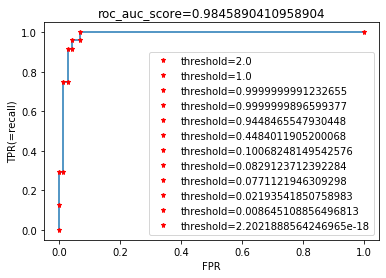

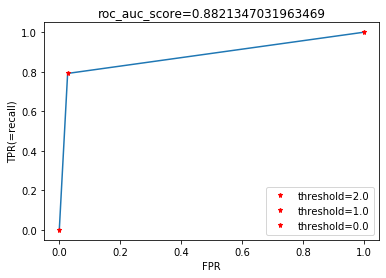

In [30]:
fpr, tpr, thresholds = roc_curve(y_test,log.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test,log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR(=recall)")

# threshold에 따라서
for i,v in enumerate(list(thresholds)):
    plt.plot(fpr[i],tpr[i],'r*',label='threshold={}'.format(v),markersize=5)
plt.title('roc_auc_score={}'.format(auc))
plt.legend()

fpr, tpr, thresholds = roc_curve(y_test,tree.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test,tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR(=recall)")

# threshold에 따라서
for i,v in enumerate(list(thresholds)):
    plt.plot(fpr[i],tpr[i],'r*',label='threshold={}'.format(v),markersize=5)
plt.title('roc_auc_score={}'.format(auc))
plt.legend()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

최적의 파라미터를 찾아 그 파라미터를 토대로 recall과 precision이 제일 좋은 모델을 찾도록 한다.

In [32]:
params = {'C':[0.01,0.1,1,10,100],'solver':['lbfgs','liblinear']}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LogisticRegression(),params,cv=5,return_train_score=True)
grid_search.fit(X_scaled,y)
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.000776,0.000389,0.000611,0.000500,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",1.0,1.000000,0.974359,...,0.973819,0.040769,1,0.967532,0.961039,0.974026,0.980645,0.967742,0.970197,0.006646
5,0.000596,0.000487,0.000418,0.000512,1,liblinear,"{'C': 1, 'solver': 'liblinear'}",1.0,0.974359,0.948718,...,0.963563,0.039317,2,0.980519,0.974026,0.993506,0.993548,0.987097,0.985739,0.007584
6,0.003968,0.000028,0.000000,0.000000,10,lbfgs,"{'C': 10, 'solver': 'lbfgs'}",1.0,0.974359,0.974359,...,0.963428,0.035778,3,0.980519,0.993506,0.993506,0.993548,0.980645,0.988345,0.006339
7,0.001378,0.000466,0.000199,0.000399,10,liblinear,"{'C': 10, 'solver': 'liblinear'}",1.0,0.974359,0.974359,...,0.963428,0.035778,3,0.987013,0.993506,0.987013,0.993548,0.987097,0.989636,0.003178
4,0.002965,0.000034,0.000812,0.000406,1,lbfgs,"{'C': 1, 'solver': 'lbfgs'}",1.0,0.974359,0.948718,...,0.958300,0.035681,5,0.967532,0.974026,0.980519,0.993548,0.980645,0.979254,0.008632


가장 좋은 파라미터는 C=0.1, solver=liblinear

In [33]:
log = LogisticRegression(C=0.1,solver='liblinear')

In [34]:
log.fit(X_train_scaled,y_train)
y_pred_scaler = log.predict(X_test_scaled)

In [35]:
print(classification_report(y_test,y_pred_scaler))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        73
           1       0.88      0.88      0.88        24

    accuracy                           0.94        97
   macro avg       0.92      0.92      0.92        97
weighted avg       0.94      0.94      0.94        97



accuracy는 괜찮게 나오지만 precision과 recall의 점수가 낮으므로 개선시킬 수 있는 임계치를 찾도록 한다.<br>

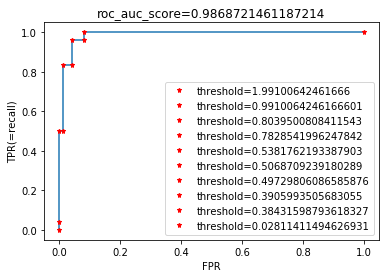

In [36]:
fpr, tpr, thresholds = roc_curve(y_test,log.predict_proba(X_test_scaled)[:,1])
auc = roc_auc_score(y_test,log.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR(=recall)")

# threshold에 따라서
for i,v in enumerate(list(thresholds)):
    plt.plot(fpr[i],tpr[i],'r*',label='threshold={}'.format(v),markersize=5)
plt.title('roc_auc_score={}'.format(auc))
plt.legend()

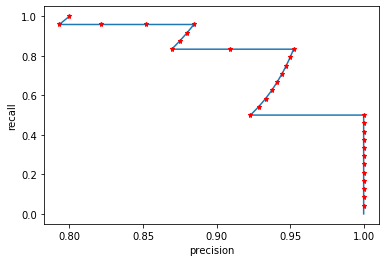

In [37]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(y_test,log.predict_proba(X_test_scaled)[:,1])

plt.figure()
plt.plot(precision,recall)
plt.xlabel("precision")
plt.ylabel("recall")

# threshold에 따라서
for i,v in enumerate(list(thresholds)):
    plt.plot(precision[i],recall[i],'r*',markersize=5)

precision이 0.95 정도 근처에서의 threshold가 recall값도 괜찮게 나오므로 해당 값을 찾도록한다.

In [38]:
for k in range(0,15):
    i = np.argmin(np.abs(precision-0.945-k/100))
    print('precision : {}, recall : {}, threshold: {}'.format(precision[i],recall[i],thresholds[i]))

precision : 0.9444444444444444, recall : 0.7083333333333334, threshold: 0.6068233242171948
precision : 0.9523809523809523, recall : 0.8333333333333334, threshold: 0.5381762193387903
precision : 0.9523809523809523, recall : 0.8333333333333334, threshold: 0.5381762193387903
precision : 0.9523809523809523, recall : 0.8333333333333334, threshold: 0.5381762193387903
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 0.5, threshold: 0.8039500808411543
precision : 1.0, recall : 

threshold가 0.54 정도면 괜찮은 수치가 나오지만 조금 더 만족스러운 수치를 위해 solver를 lbfgs(기본값)로 바꾸고 진행한다. <br>이때 C값은 10일 때가 정확도 측면에서 최적이다.

In [39]:
log = LogisticRegression(C=10)

In [40]:
log.fit(X_train_scaled,y_train)
y_pred_scaler = log.predict(X_test_scaled)

In [41]:
print(classification_report(y_test,y_pred_scaler))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96        73
           1       0.95      0.79      0.86        24

    accuracy                           0.94        97
   macro avg       0.94      0.89      0.91        97
weighted avg       0.94      0.94      0.94        97



precision이 꽤 괜찮게 나오지만 recall이 낮기 때문에 균형을 이룰 수 있는 threshold를 찾도록 한다.

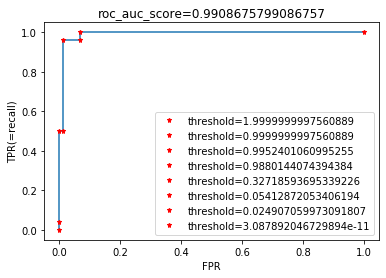

In [42]:
fpr, tpr, thresholds = roc_curve(y_test,log.predict_proba(X_test_scaled)[:,1])
auc = roc_auc_score(y_test,log.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR(=recall)")

# threshold에 따라서
for i,v in enumerate(list(thresholds)):
    plt.plot(fpr[i],tpr[i],'r*',label='threshold={}'.format(v),markersize=5)
plt.title('roc_auc_score={}'.format(auc))
plt.legend()

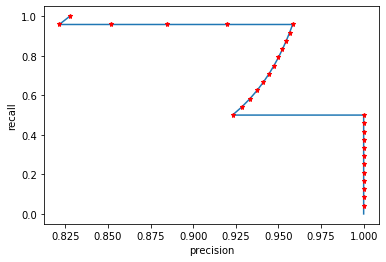

In [43]:
precision,recall,thresholds = precision_recall_curve(y_test,log.predict_proba(X_test_scaled)[:,1])

plt.figure()
plt.plot(precision,recall)
plt.xlabel("precision")
plt.ylabel("recall")

# threshold에 따라서
for i,v in enumerate(list(thresholds)):
    plt.plot(precision[i],recall[i],'r*',markersize=5)

precision이 0.95 정도 근처에서의 threshold가 recall값도 괜찮게 나오므로 해당 값을 찾도록한다.

In [44]:
for k in range(0,15):
    i = np.argmin(np.abs(precision-0.945-k/100))
    print('precision : {}, recall : {}, threshold: {}'.format(precision[i],recall[i],thresholds[i]))

precision : 0.9444444444444444, recall : 0.7083333333333334, threshold: 0.8227574941522426
precision : 0.9545454545454546, recall : 0.875, threshold: 0.4098948021210839
precision : 0.9583333333333334, recall : 0.9583333333333334, threshold: 0.32718593695339226
precision : 0.9583333333333334, recall : 0.9583333333333334, threshold: 0.32718593695339226
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, threshold: 0.9952401060995255
precision : 1.0, recall : 0.5, thresh

threshold가 0.33 정도일 때 precision과 recall 모두 매우 높은 값을 갖는다. <br>
비록 정확도 측면에서는 solver 파라미터가 liblinear일 때 높지만 recall이나 precision같은 수치 측면에서는 solver를 기본값으로 하는게 더 낫다.

이 threshold에서의 정확도를 체크해보도록 한다.

In [45]:
log.predict_proba(X_test_scaled)[:,1]>0.33

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False, False, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False])

In [46]:
real_pred_df = pd.DataFrame(y_test)
real_pred_df['예측값'] = log.predict_proba(X_test_scaled)[:,1]>0.33

In [47]:
real_pred_df[15:25]

,선진국여부,예측값
58,0,False
29,0,False
51,1,True
6,1,True
136,0,False
180,0,False
5,0,False
141,0,False
43,0,False
121,1,True


In [48]:
def convert_bool(x):
    if x == False:
        x=0
    else:
        x=1
    return x
real_pred_df['예측값'] = real_pred_df['예측값'].map(convert_bool)

In [49]:
real_pred_df[15:25]

,선진국여부,예측값
58,0,0
29,0,0
51,1,1
6,1,1
136,0,0
180,0,0
5,0,0
141,0,0
43,0,0
121,1,1


In [50]:
real_pred_df.sum(axis=1).value_counts()

0    72
2    22
1     3
dtype: int64

97개 중에서 3개 정도만 일치하지 않기 때문에 정확도 역시 매우 높다고 할 수 있다. 

In [51]:
94/97

0.9690721649484536

In [52]:
# 이 모델이 판단을 내릴 때 가장 영향을 많이 미치는 변수 
pd.DataFrame(list(log.coef_),columns=list(X.columns))

,청렴도,민주주의지수,교육지수,gdp,평균수명,문해율,언론자유지수
0,-0.533966,1.284279,2.246487,3.548757,1.773667,0.103054,-1.808646


In [53]:
# 해당 모델이 잘못 분류한 케이스
df.iloc[y_test[real_pred_df.sum(axis=1)==1].index]

,국가,선진국여부,청렴도,민주주의지수,교육지수,gdp,평균수명,문해율,언론자유지수
27,라트비아,1,58.000000,7.490000,0.835,18172.0,73.950000,99.8,19.53
106,안도라,1,46.076923,6.412069,0.718,15956.5,74.164839,100.0,24.63
151,카타르,0,62.000000,3.190000,0.698,69688.0,78.880000,96.3,42.51


In [54]:
df.groupby('선진국여부').mean()

,청렴도,민주주의지수,교육지수,gdp,평균수명,문해율,언론자유지수
선진국여부,,,,,,,
0,36.760221,4.713732,0.584754,6705.213822,68.121165,81.258156,38.961710
1,67.473866,8.080886,0.845749,43307.153846,80.287531,98.396325,20.426304


In [55]:
# threshold가 0.5일 때 선진국으로 분류한 국가들 중 실제 선진국인지 아닌지를 나타냄
df.iloc[y_test[log.predict(X_test_scaled)==1].index]['선진국여부'].value_counts()

1    19
0     1
Name: 선진국여부, dtype: int64

In [56]:
# threshold가 0.33일 때 선진국으로 분류한 국가들 중 실제 선진국인지 아닌지를 나타냄
df.iloc[y_test[real_pred_df['예측값']==1].index]['선진국여부'].value_counts()

1    22
0     1
Name: 선진국여부, dtype: int64

결론 : 정확도와 recall, precision을 모두 따졌을 때 LogisticRegression의 C=10, solver='lbfgs'를 파라마터로 갖는 모델에 threshold를 0.33 정도로 맞춰주면 상당한 효과를 얻을 수 있다.
정확도 : 0.9691 , recall: 0.9583 , precision :  0.95833

gdp, 교육지수, 언론자유지수, 평균수명, 민주주의지수, 청렴도, 문해율 순으로 이 모델의 분류에 영향을 미친다.